# **Social Network Analysis Homework** 
## **Davit Davtyan**

## **Scenario** 
#### You are working in the marketing department or at Marketing Agency, and your goal is to detect the most important guys to target them. Considering the budget is limited, you should help the marketing specialist to decide whom to target.
#### You have a data called connections.txt, it is list of edges.

# **Tasks**

### **Import Libraries**

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from heapq import nlargest, nsmallest
import scipy as sp
from infomap import Infomap
import networkx.algorithms.community as nxcom
import numpy as np
from collections import defaultdict

## **1. Create a Directed graph.** 

In [6]:
G = nx.DiGraph()

# Add edges to the graph
with open('connections.txt', 'r') as file:
    for line in file:
        node1, node2 = line.strip().split()
        G.add_edge(node1, node2)

## **2. Show which nodes are bridges.** 

### **2.1 All bridge nodes of directed graph.**

In [7]:
def find_bridges_directed(G):
    original_num_components = nx.number_strongly_connected_components(G)
    bridges = []
    for node in G.nodes():
        G_copy = G.copy()
        G_copy.remove_node(node)
        if nx.number_strongly_connected_components(G_copy) > original_num_components:
            bridges.append(node)
    return bridges

bridge_nodes = find_bridges_directed(G)

### **2.2 All bridge nodes of undirected graph.**
#### The reason that I also identify the bridge nodes of undirected graph is that in a directed graph, edges have a direction, and the concept of connectivity is not so intuitive. In directed graphs, there are different notions of connectivity, such as strong connectivity and weak connectivity, and the removal of an edge may not necessarily impact the overall connectivity of the graph in the same way as in undirected graphs. In an undirected graph, the removal of a bridge can disconnect the graph or split it into multiple components.

In [8]:
G_undirected = G.copy().to_undirected()

bridges_undirected = list(nx.bridges(G_undirected))

## **3. Show the density of the graph. Comment about your findings.**

In [10]:
density = nx.density(G)
print("Density of the graph is", density)

if density > 0.5:
    print("The graph is relatively dense, so there are considerably many connections between nodes.")
elif density > 0.1:
    print("The graph has a moderate level of density.")
else:
    print("The graph is sparse, so there are quite few connections between nodes.")

Density of the graph is 0.0054099817517196435
The graph is sparse, so there are quite few connections between nodes.


In [12]:
(G.number_of_nodes(), G.number_of_edges())

(4039, 88234)

#### There doesn't exist any universal rule for defining the density of the graph. In this case, considering the volume of our connections data, I believe that 0.005 density should be considered as sparse, as it's indicates the sparsity of the connections between nodes.

## **4. Show which nodes have the highest and lowest number of connections.**

### **4.1 Find the 10 nodes with the highest degree.**

In [14]:
degrees = dict(G.degree)
highest_degrees = nlargest(10, degrees, key=degrees.get)

print("Top 10 nodes with the highest connections:")
for i in highest_degrees:
    print(f"Node {i}: Degree {degrees[i]}")

Top 10 nodes with the highest connections:
Node 107: Degree 1045
Node 1684: Degree 792
Node 1912: Degree 755
Node 3437: Degree 547
Node 0: Degree 347
Node 2543: Degree 294
Node 2347: Degree 291
Node 1888: Degree 254
Node 1800: Degree 245
Node 1663: Degree 235


### **4.2 Find the 10 nodes with the lowest degree.**

In [16]:
lowest_degrees = nsmallest(10, degrees, key=degrees.get)

print("Top 10 nodes with the lowest connections:")
for i in lowest_degrees:
    print(f"Node {i}: Degree {degrees[i]}")

Top 10 nodes with the lowest connections:
Node 11: Degree 1
Node 12: Degree 1
Node 15: Degree 1
Node 18: Degree 1
Node 37: Degree 1
Node 43: Degree 1
Node 74: Degree 1
Node 114: Degree 1
Node 209: Degree 1
Node 210: Degree 1


## **5. Show which nodes have the highest incoming and outgoing connections.**

### **5.1 10 Highest Incoming Connections.**

In [17]:
in_degrees = dict(G.in_degree)
highest_IN_degrees = nlargest(10, in_degrees, key = in_degrees.get)

print("10 Highest Incoming Connections:")
for i in highest_IN_degrees:
    print(f'Node {i}: Degree {in_degrees[i]}')

10 Highest Incoming Connections:
Node 1888: Degree 251
Node 2543: Degree 246
Node 1800: Degree 216
Node 2611: Degree 197
Node 1827: Degree 186
Node 1730: Degree 183
Node 2607: Degree 183
Node 1833: Degree 182
Node 2602: Degree 182
Node 2604: Degree 182


### **5.2 10 Highest Outgoing Connections.**

In [18]:
out_degrees = dict(G.out_degree)
highest_OUT_degrees = nlargest(10, out_degrees, key = out_degrees.get)

print("10 Highest Outgoing Connections:")
for i in highest_OUT_degrees:
    print(f'Node {i}: Degree {out_degrees[i]}')

10 Highest Outgoing Connections:
Node 107: Degree 1043
Node 1684: Degree 778
Node 1912: Degree 748
Node 3437: Degree 542
Node 0: Degree 347
Node 348: Degree 225
Node 1941: Degree 215
Node 1985: Degree 207
Node 483: Degree 191
Node 1917: Degree 189


## **6. Show which nodes have the highest closeness, betweenness, and eigenvector | Interpret your findings.**

### **6.1 Closeness Centrality.**

In [19]:
closeness = nx.closeness_centrality(G)
top_closeness = nlargest(10, closeness, key=closeness.get)
print("10 Highest Closeness Centrality Nodes:")
for i in top_closeness:
    print(f'Node {i}: Closeness {closeness[i]}')

10 Highest Closeness Centrality Nodes:
Node 2642: Closeness 0.11797503012816456
Node 2649: Closeness 0.11793232689533308
Node 2629: Closeness 0.11629338421878259
Node 2643: Closeness 0.11591804904451317
Node 2543: Closeness 0.11590243183892303
Node 2598: Closeness 0.11575806082880183
Node 2653: Closeness 0.11445163014209331
Node 2617: Closeness 0.1124444577085752
Node 2616: Closeness 0.1123491465226688
Node 2555: Closeness 0.11138475818308745


### **6.1.1 Interpretation.**

##### In general, **closeness centrality** measures how close a node is to other nodes in the network. So, nodes with high closeness centrality values are considered to be central in terms of proximity to other nodes.

##### Based on the above results, we can see that all 10 nodes are quite close to each other. **Node 2642** has the highest closeness centrality, it is very close to other nodes in the network. **Node 2649** is also very central in terms of closeness. The remaining nodes also have relatively high closeness centrality, they are closely connected to other nodes in the network.

### **6.2 Betweenness Centrality.**

In [20]:
betweenness = nx.betweenness_centrality(G)
top_betweenness = nlargest(10, betweenness, key=betweenness.get)
print("10 Highest Betweenness Centrality Nodes:")
for i in top_betweenness:
    print(f'Node {i}: Betweenness {betweenness[i]}')

10 Highest Betweenness Centrality Nodes:
Node 1684: Betweenness 0.03299985344063623
Node 1912: Betweenness 0.027145672353148857
Node 1718: Betweenness 0.026577614223444346
Node 563: Betweenness 0.01300961569074186
Node 1405: Betweenness 0.010123670299605515
Node 1656: Betweenness 0.009425937129610911
Node 1086: Betweenness 0.008553563518788857
Node 567: Betweenness 0.008300375906658487
Node 3437: Betweenness 0.008194350620311139
Node 119: Betweenness 0.006358997369476009


### **6.2.1 Interpretation.**

##### In general, **Betweenness centrality** identifies nodes that act as bridges in the network. Nodes with high betweenness centrality values play a crucial role in connecting different parts of the network.

##### Based on the above results, **Node 1684** has the highest betweenness centrality, it lies on many shortest paths between other nodes. **Nodes 1912, 1718, 563** also have significant betweenness centrality, being important while connecting different parts of the network.

### **6.3 Eigenvector Centrality.**

In [21]:
eigenvector = nx.eigenvector_centrality(G, max_iter=300)
top_eigenvector = nlargest(10, eigenvector, key=eigenvector.get)
print("10 Highest Eigenvector Centrality Nodes:")
for i in top_eigenvector:
    print(f'Node {i}: Eigenvector {eigenvector[i]}')

10 Highest Eigenvector Centrality Nodes:
Node 2655: Eigenvector 0.8027042996706522
Node 2654: Eigenvector 0.47986846225069085
Node 2646: Eigenvector 0.22755258082041144
Node 2638: Eigenvector 0.17819686548554586
Node 2631: Eigenvector 0.16693182569883536
Node 2630: Eigenvector 0.09478306024200825
Node 2625: Eigenvector 0.059114290482167264
Node 2624: Eigenvector 0.03321924750750348
Node 2619: Eigenvector 0.013399669488129021
Node 2623: Eigenvector 0.012130507791556274


### **6.3.1 Interpretation.**

##### In general, **eigenvector centrality** assigns importance to nodes based on their connections to other important nodes. Nodes with high eigenvector centrality are connected to other nodes with high centrality.

##### Based on the above results, **Node 2655** has the highest eigenvector centrality, it is connected to other nodes that are also well-connected to other important nodes. **Nodes 2654, 2646** also have relatively high eigenvector centrality.

## **7. Implement a community detection algorithm on the directed graph and show how many communities were created.**

In [79]:
def run_infomap_on_directed_graph(G):
    im = Infomap("--two-level --directed")

    node_to_int = {node: idx for idx, node in enumerate(G.nodes())}
    int_to_node = {idx: node for node, idx in node_to_int.items()}

    for source, target in G.edges():
        im.addLink(node_to_int[source], node_to_int[target])

    im.run()

    # Extract communities and map back to original node identifiers
    communities = {int_to_node[node.node_id]: node.module_id for node in im.tree if node.is_leaf}

    # Assign communities back to the graph
    nx.set_node_attributes(G, communities, 'community')

    return im.num_top_modules

num_communities = run_infomap_on_directed_graph(G)
print(f"Number of communities detected: {num_communities}")

Number of communities detected: 100


### As per the infomap algorithm, we got 100 communities.

## **8. Show the largest and the smallest community. | Interpret your findings.** 

In [80]:
# Group nodes by community
community_nodes = defaultdict(list)
for node, data in G.nodes(data=True):
    community = data.get('community')
    if community is not None:
        community_nodes[community].append(node)

largest_community = max(community_nodes, key=lambda k: len(community_nodes[k]))
smallest_community = min(community_nodes, key=lambda k: len(community_nodes[k]))

print(f"Largest community (ID: {largest_community}) has {len(community_nodes[largest_community])} nodes")
print(f"Smallest community (ID: {smallest_community}) has {len(community_nodes[smallest_community])} nodes")

Largest community (ID: 1) has 349 nodes
Smallest community (ID: 98) has 2 nodes


## **8.1 Interpretation.**

##### **Largest Community (ID: 1 with 349 nodes)** is significantly large, a considerable portion of the nodes in our graph are closely related or interconnected. In a social network, such a large community might represent a popular interest group or a social segment with common characteristics, indicating strong connections or interactions among its members.

##### **Smallest Community (ID: 98 with 2 nodes)** with only 2 nodes indicates a highly specific or isolated relationship within the network. In social contexts, such a small community might represent a niche or highly specialized interest group, or an emerging trend that hasn’t yet gained widespread popularity.

## **9. Select the largest three communities and draw them. After doing so, remove the top 3 nodes with the highest Degree Centrality, Closeness Centrality, Betweenness Centrality, and Eigenvector. Each should be in a separate plot/draw.**

### **9.1 Identify and Draw the Largest Three Communities.**

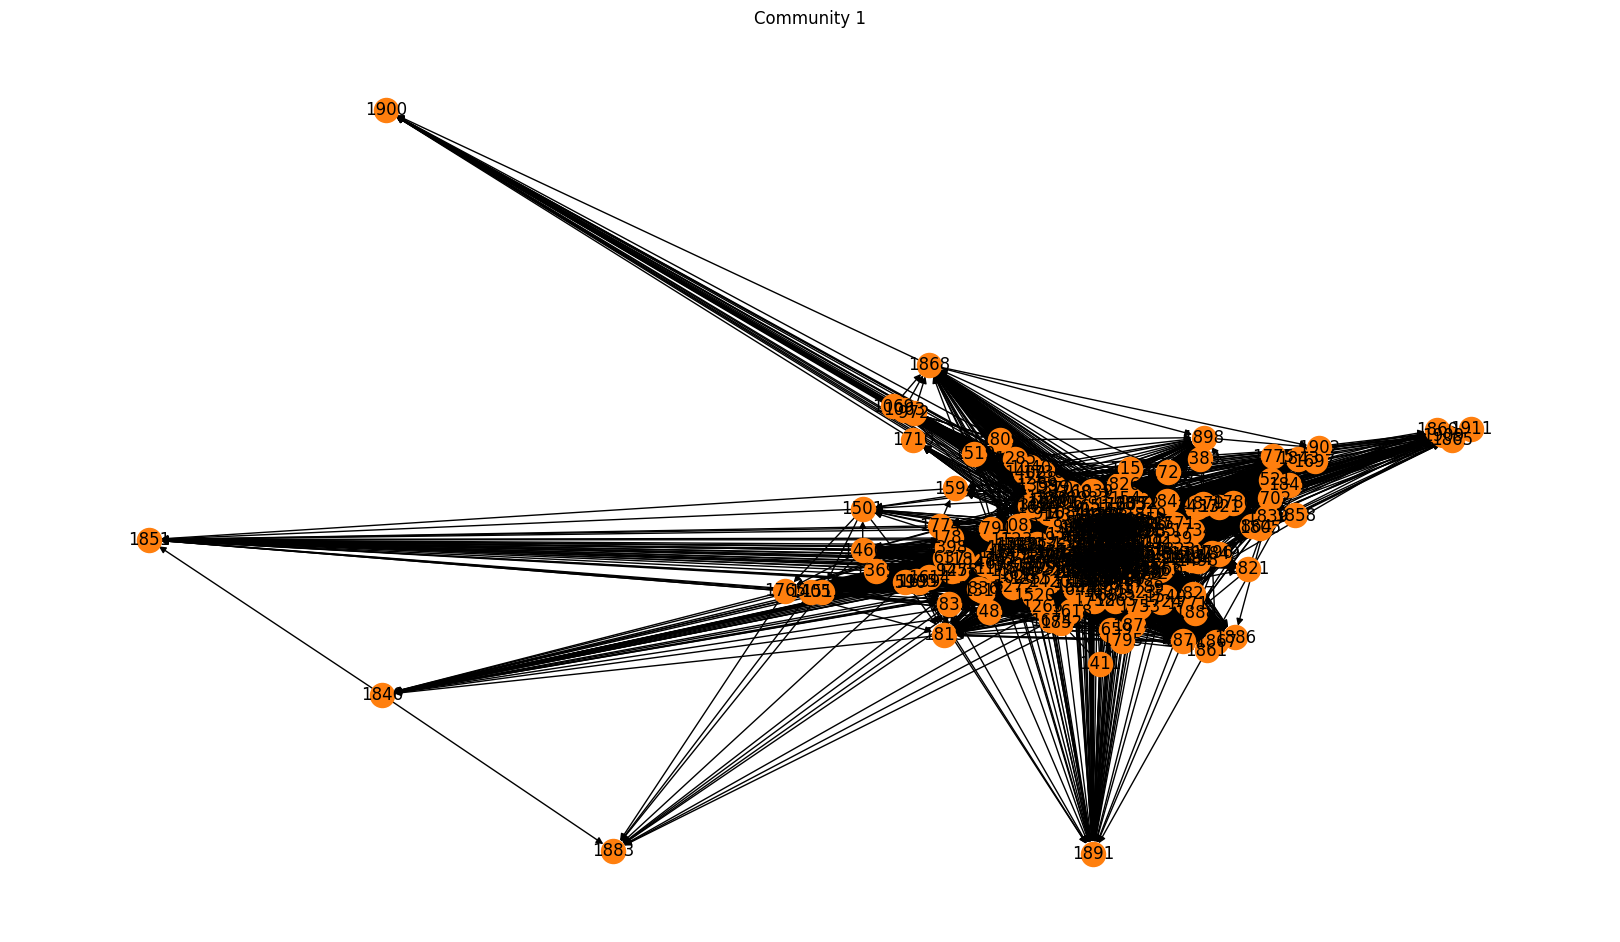

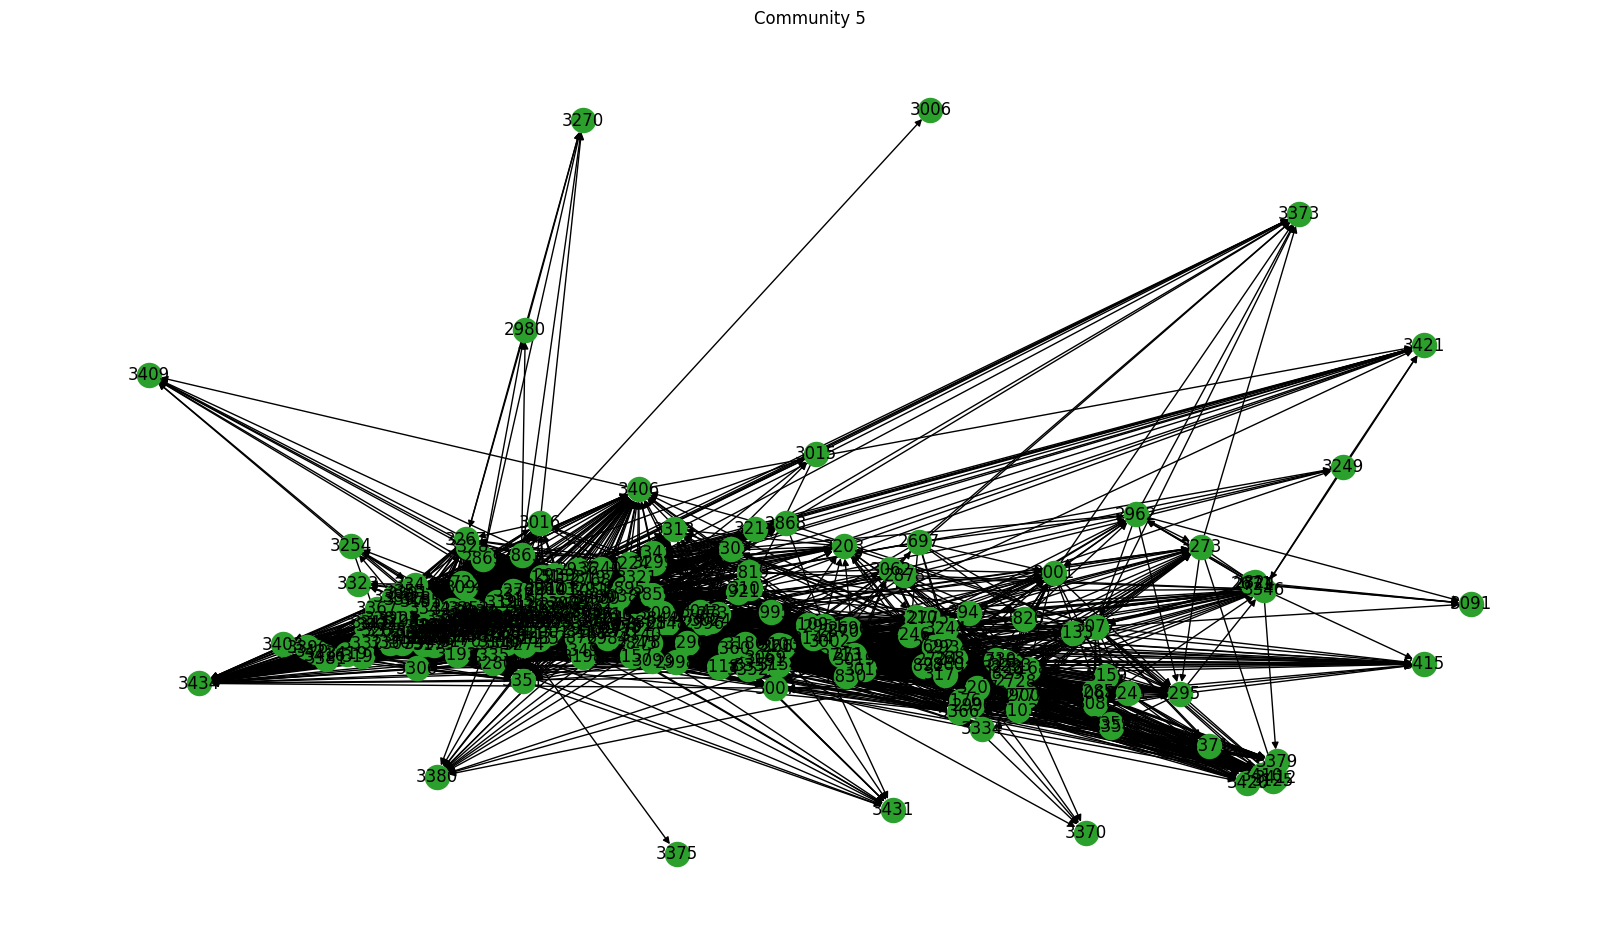

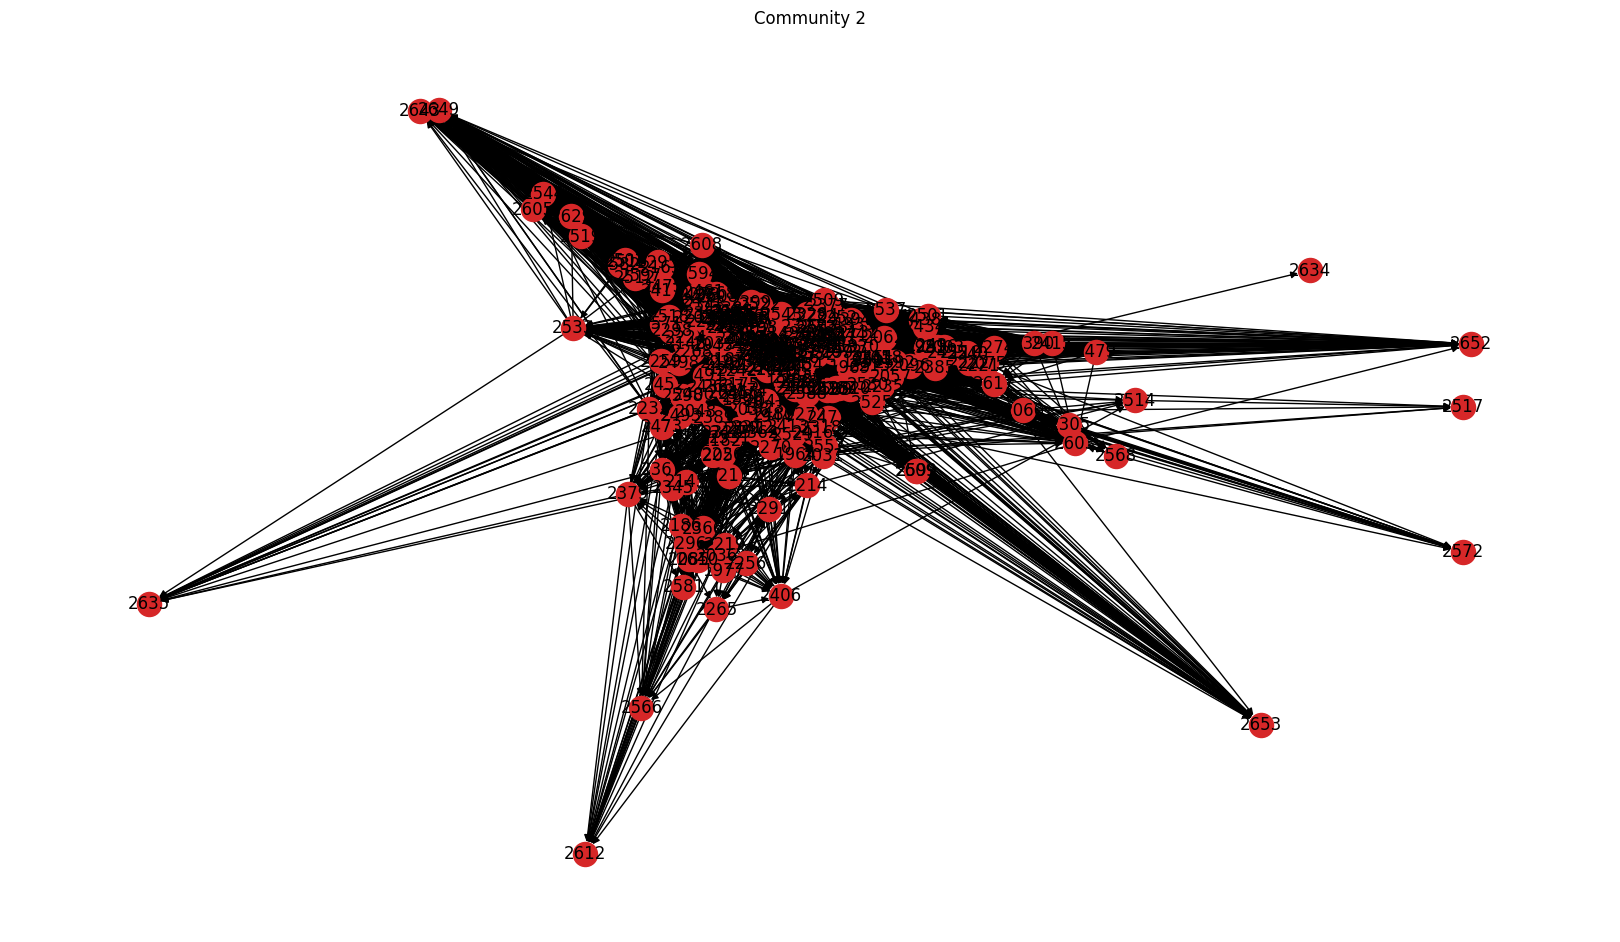

In [82]:
three_largest_communities = sorted(community_nodes, key=lambda k: len(community_nodes[k]), reverse=True)[:3]

for i, community_id in enumerate(three_largest_communities, start=1):
    plt.figure(figsize=(16, 9))
    H = G.subgraph(community_nodes[community_id])
    nx.draw(H, with_labels=True, node_color=f'C{i}')
    plt.title(f'Community {community_id}')
    plt.show()

### **9.2 Remove Top 3 Nodes Based on Centrality Measures and Redraw.**

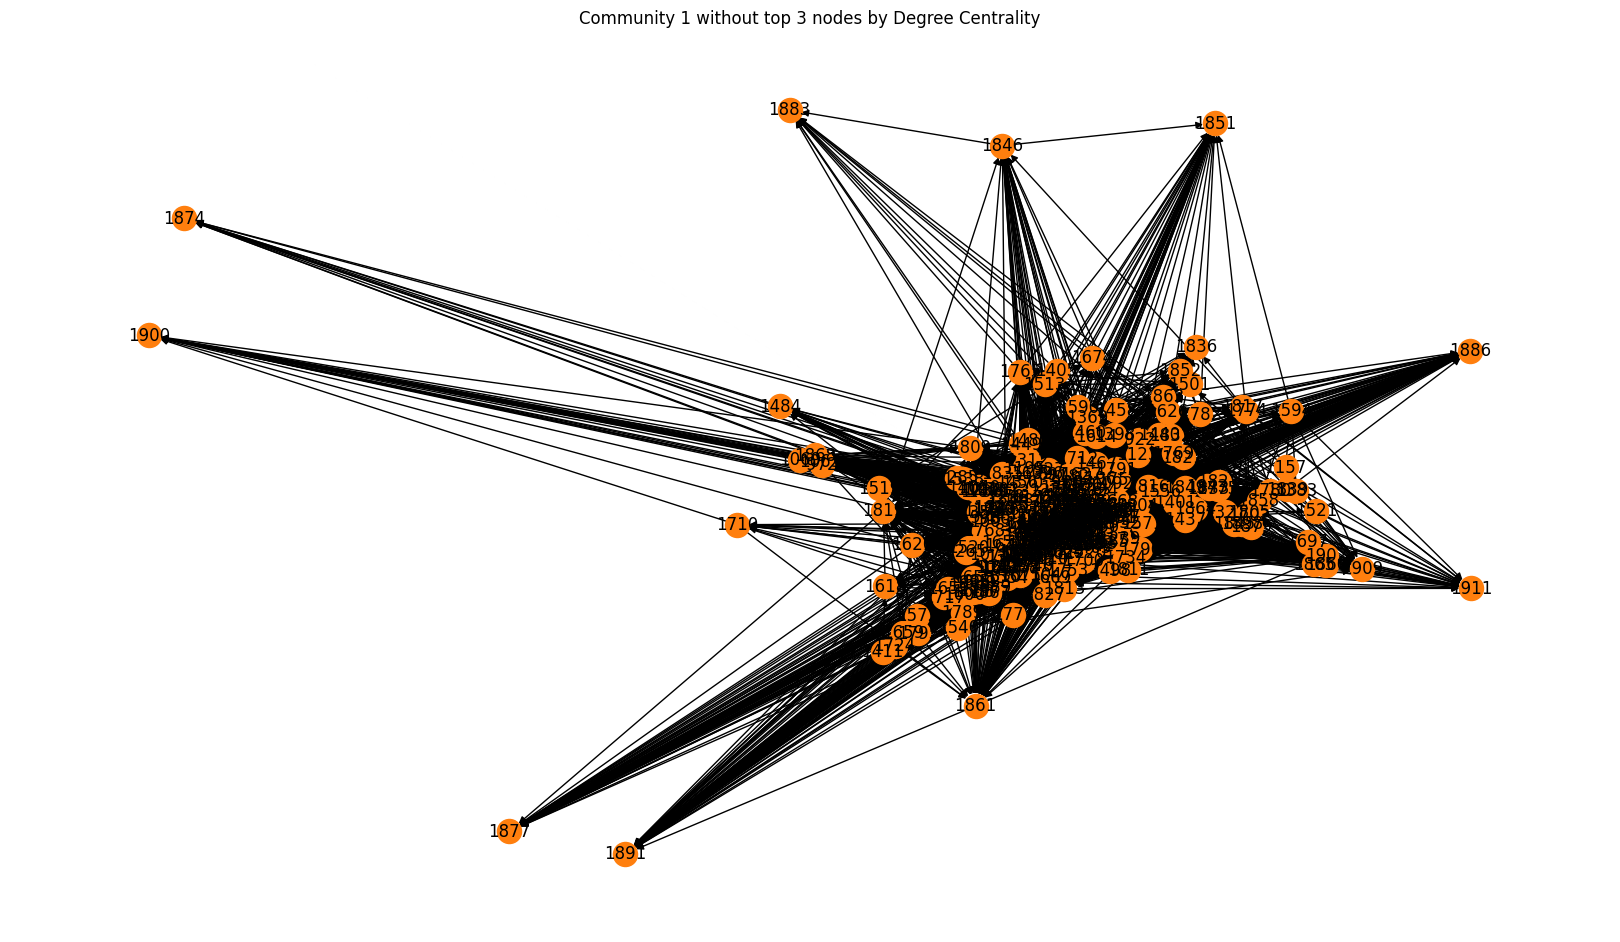

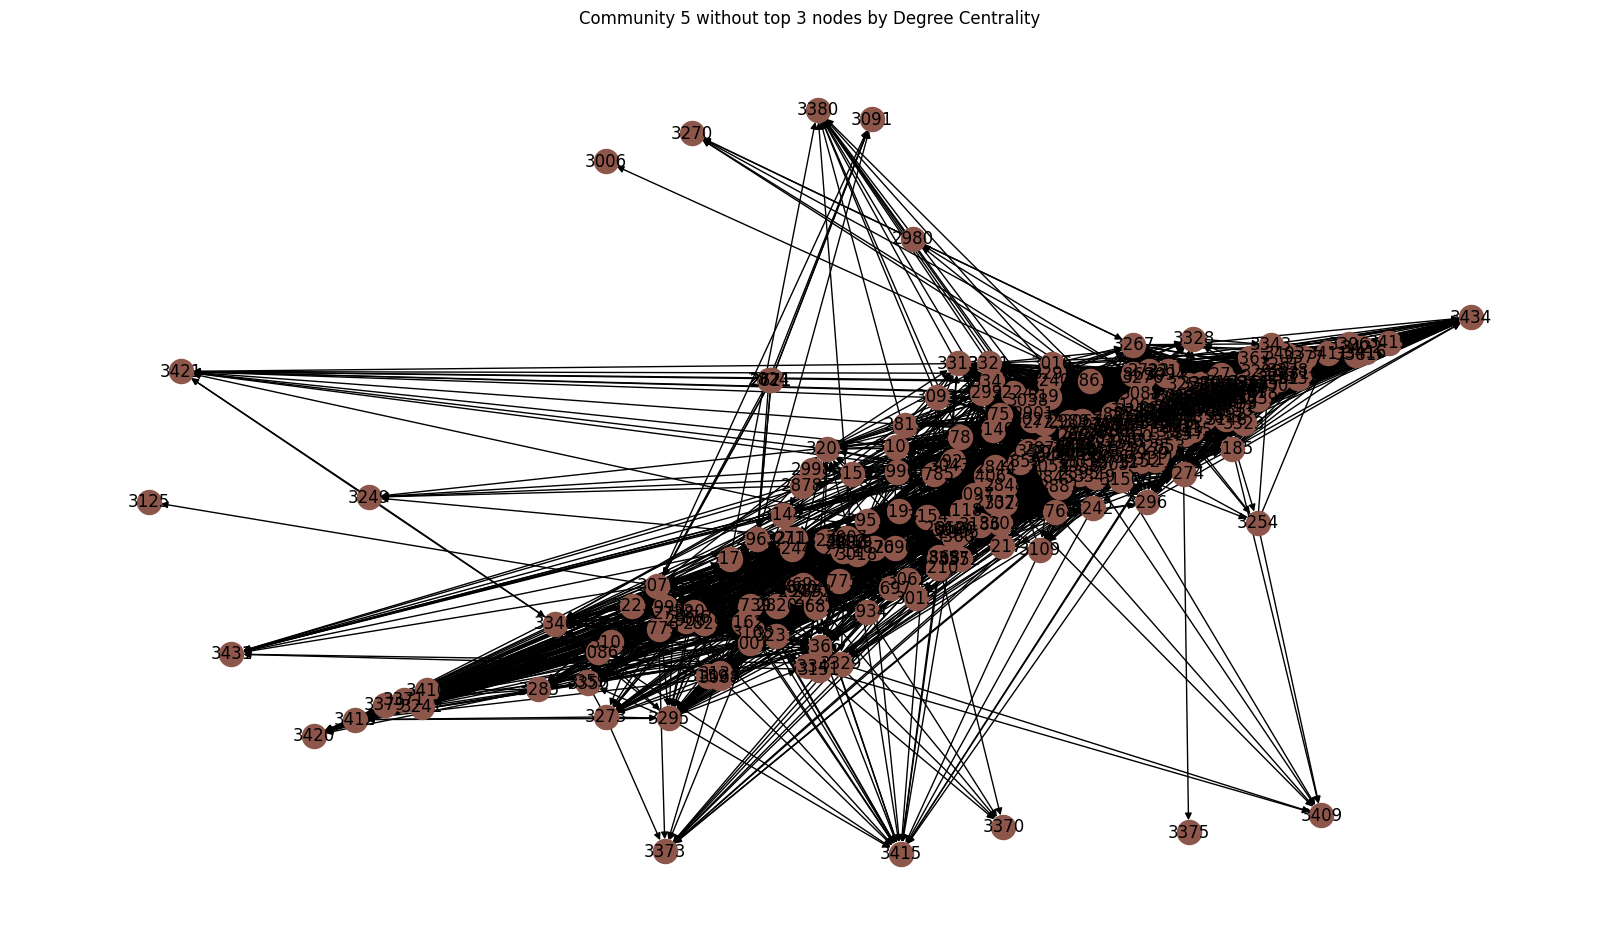

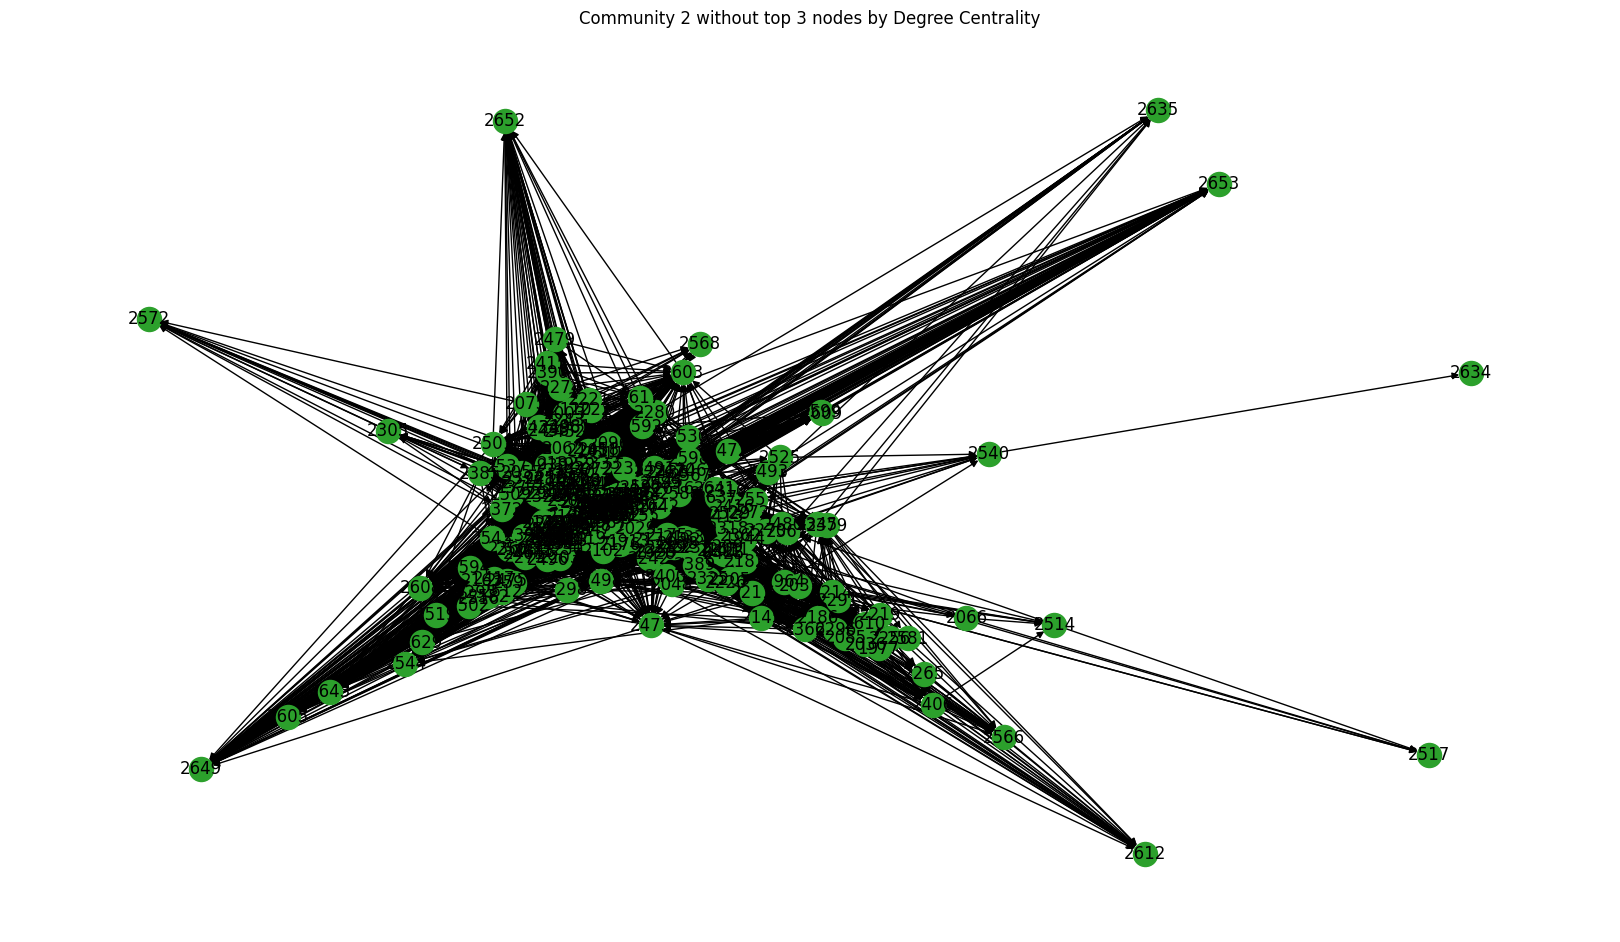

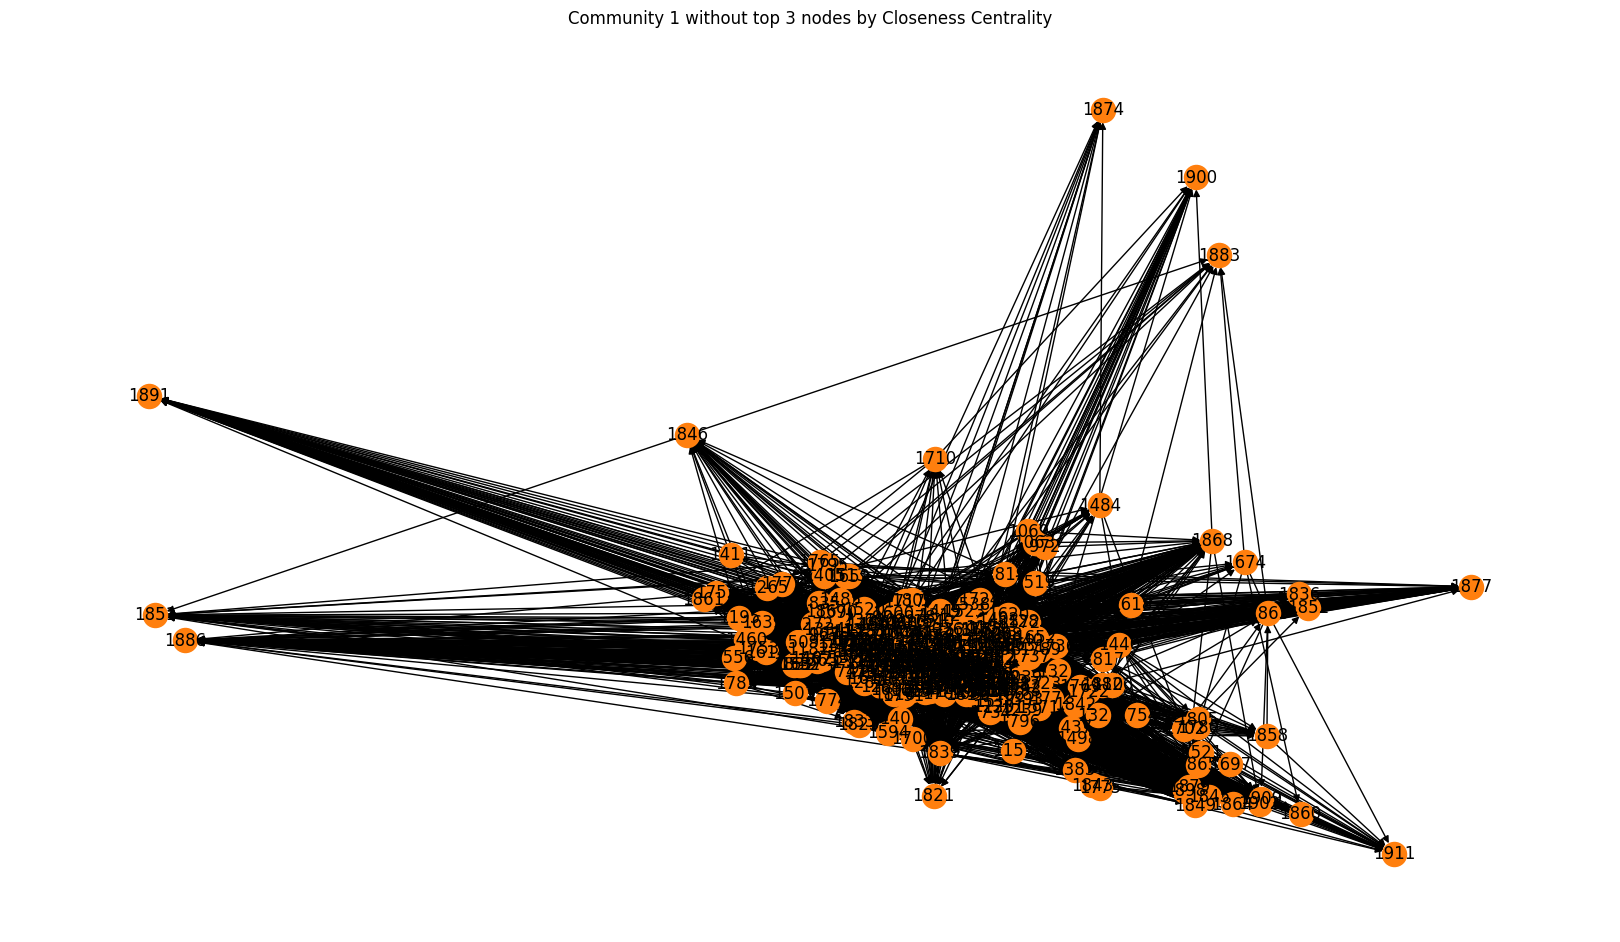

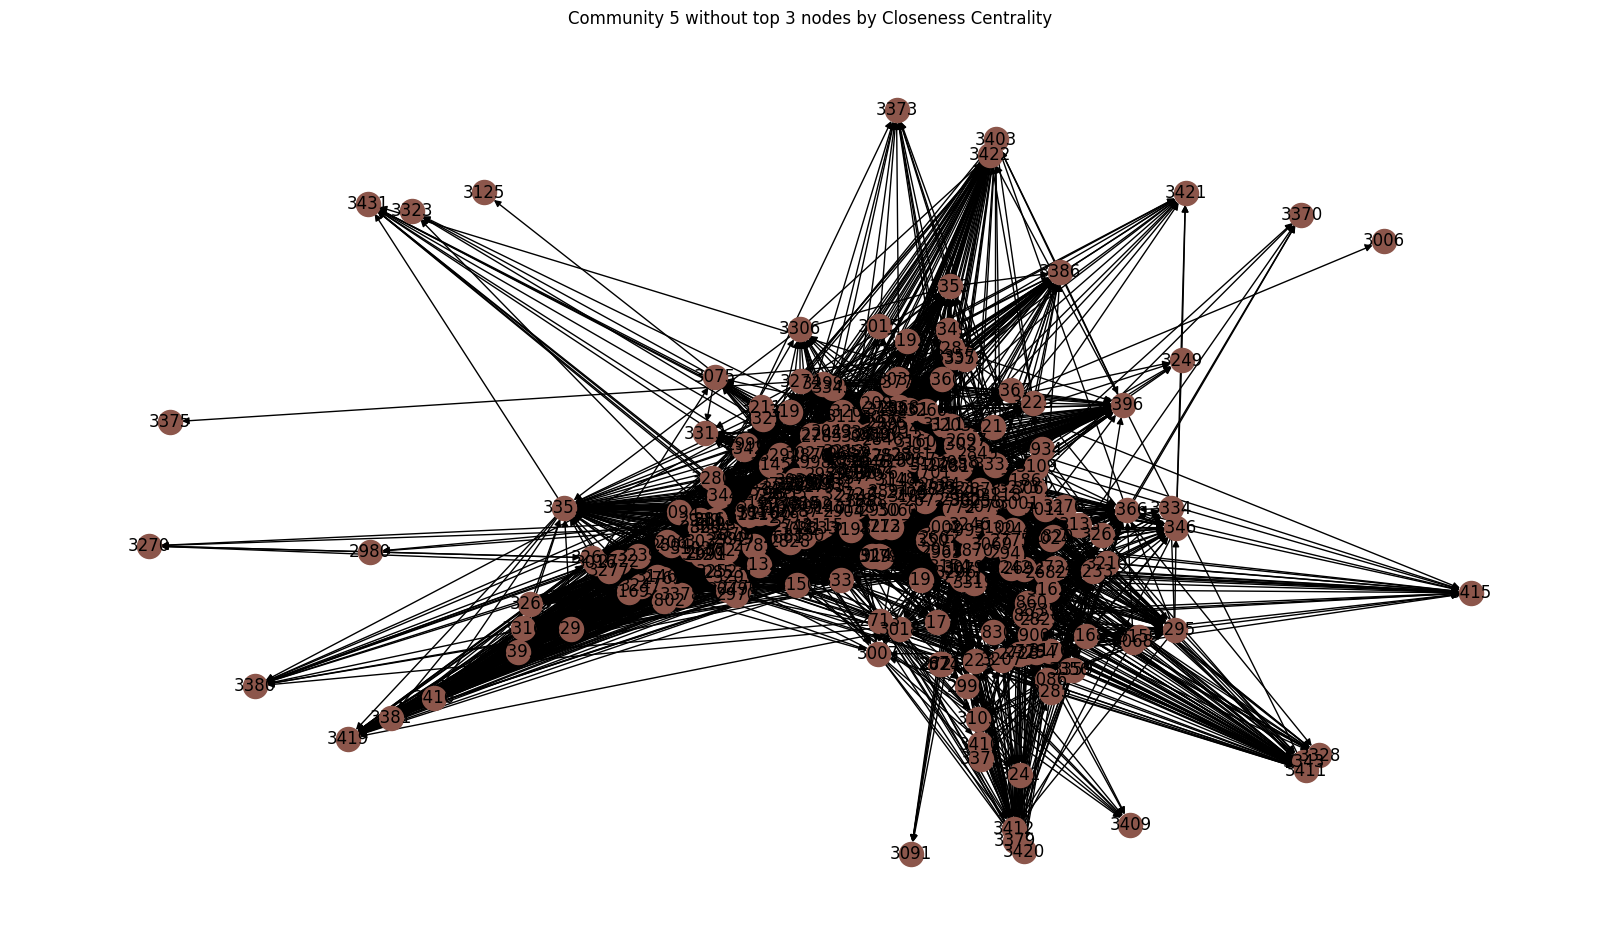

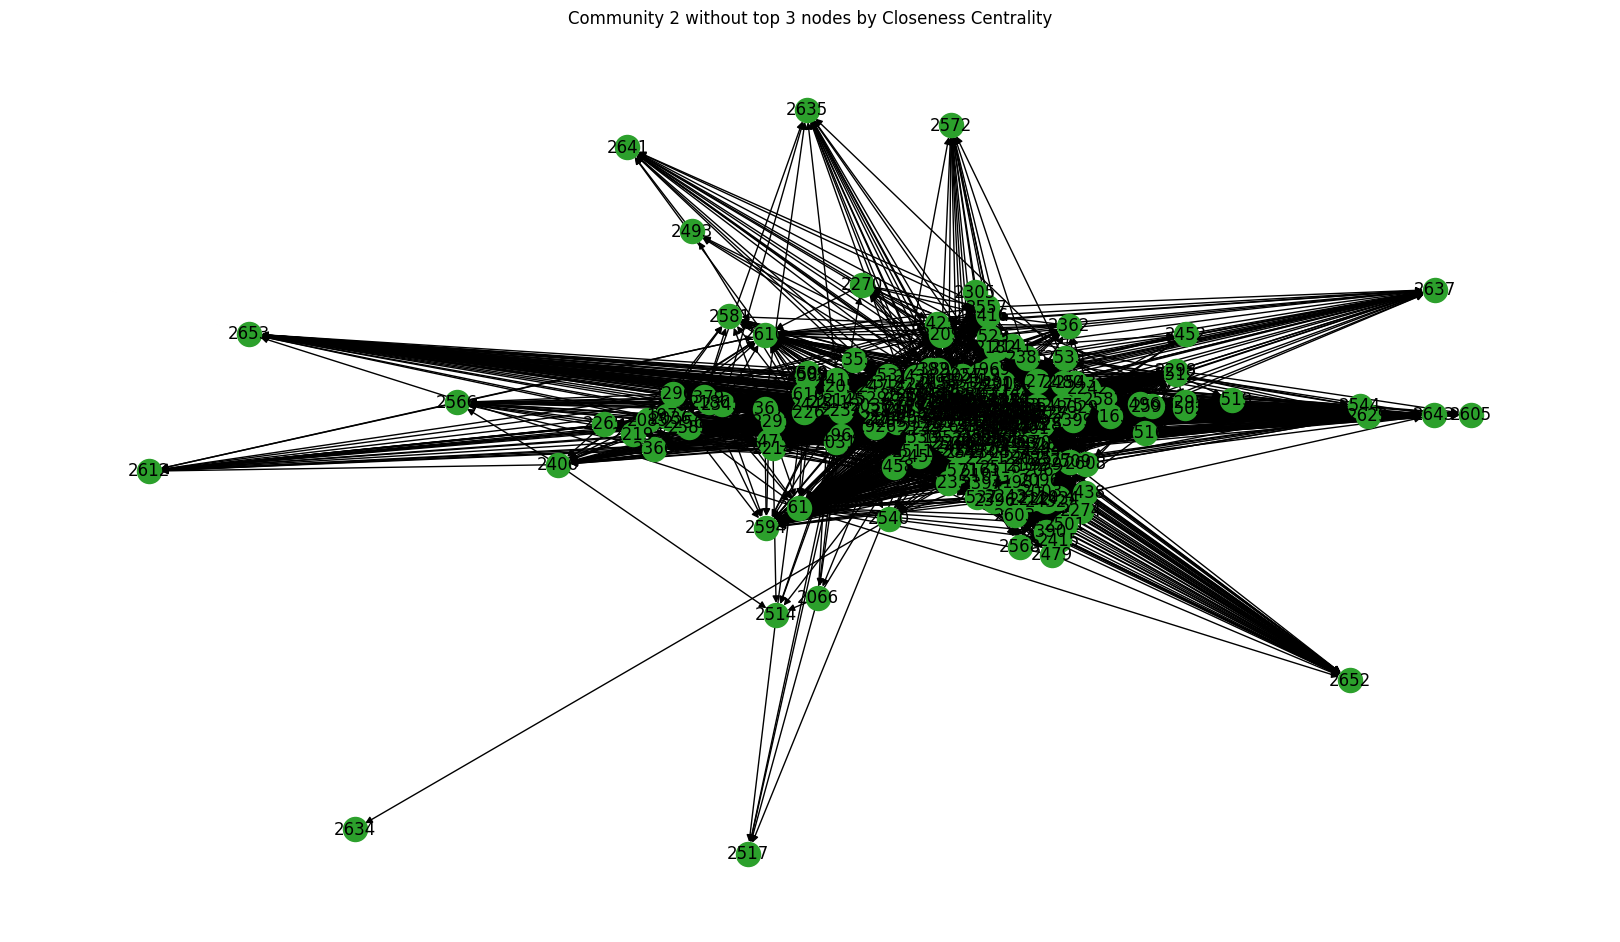

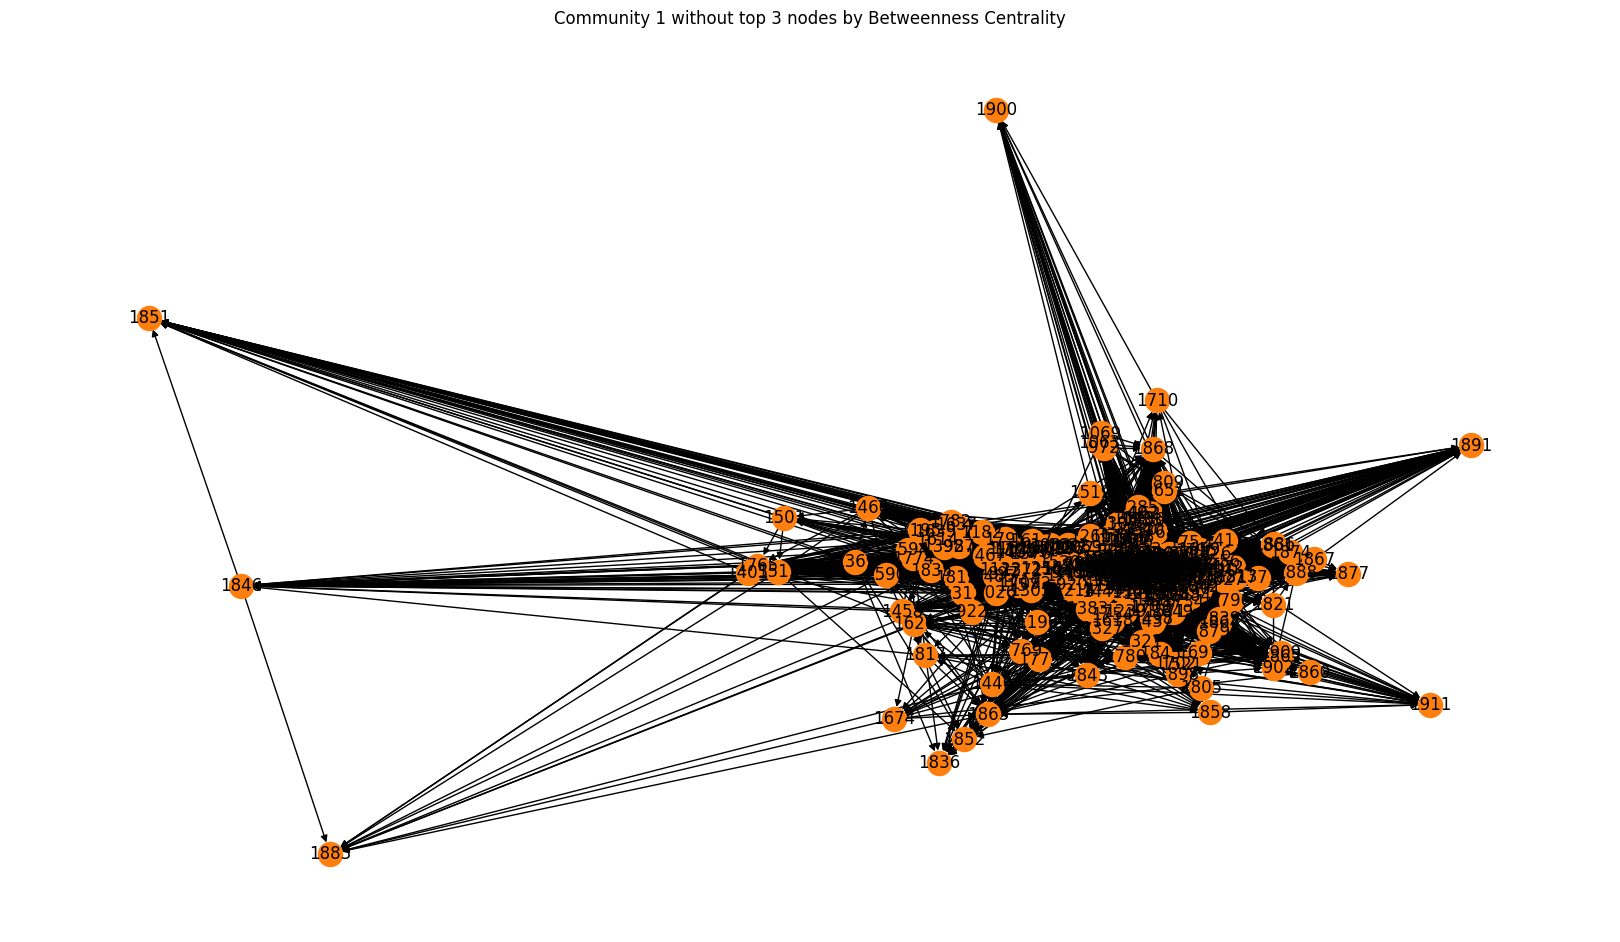

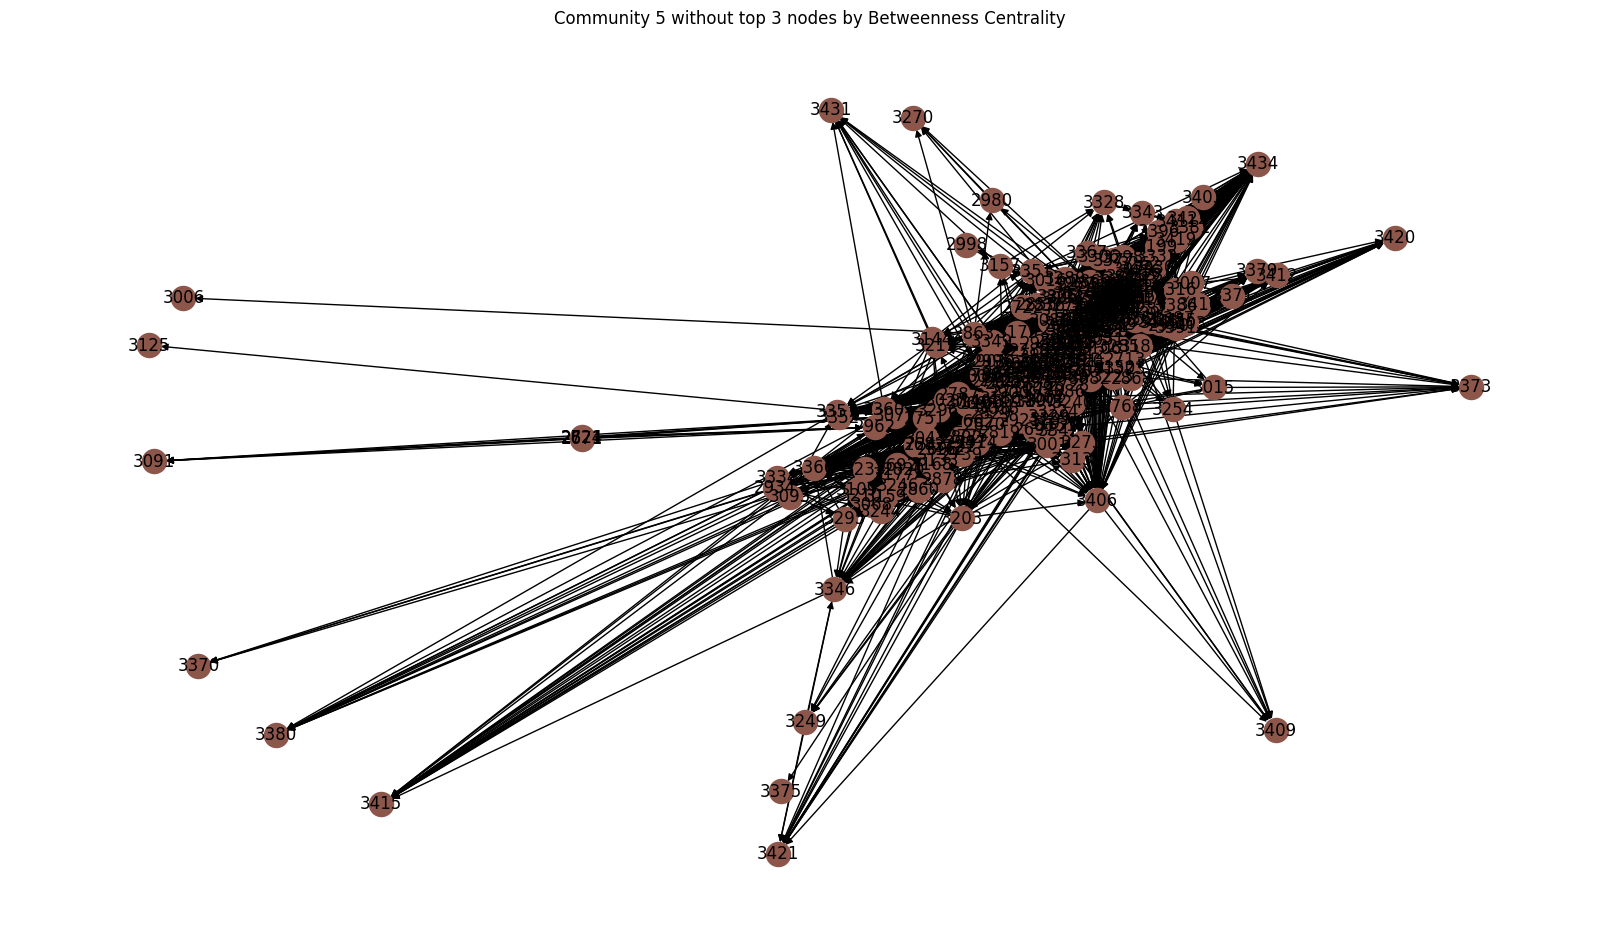

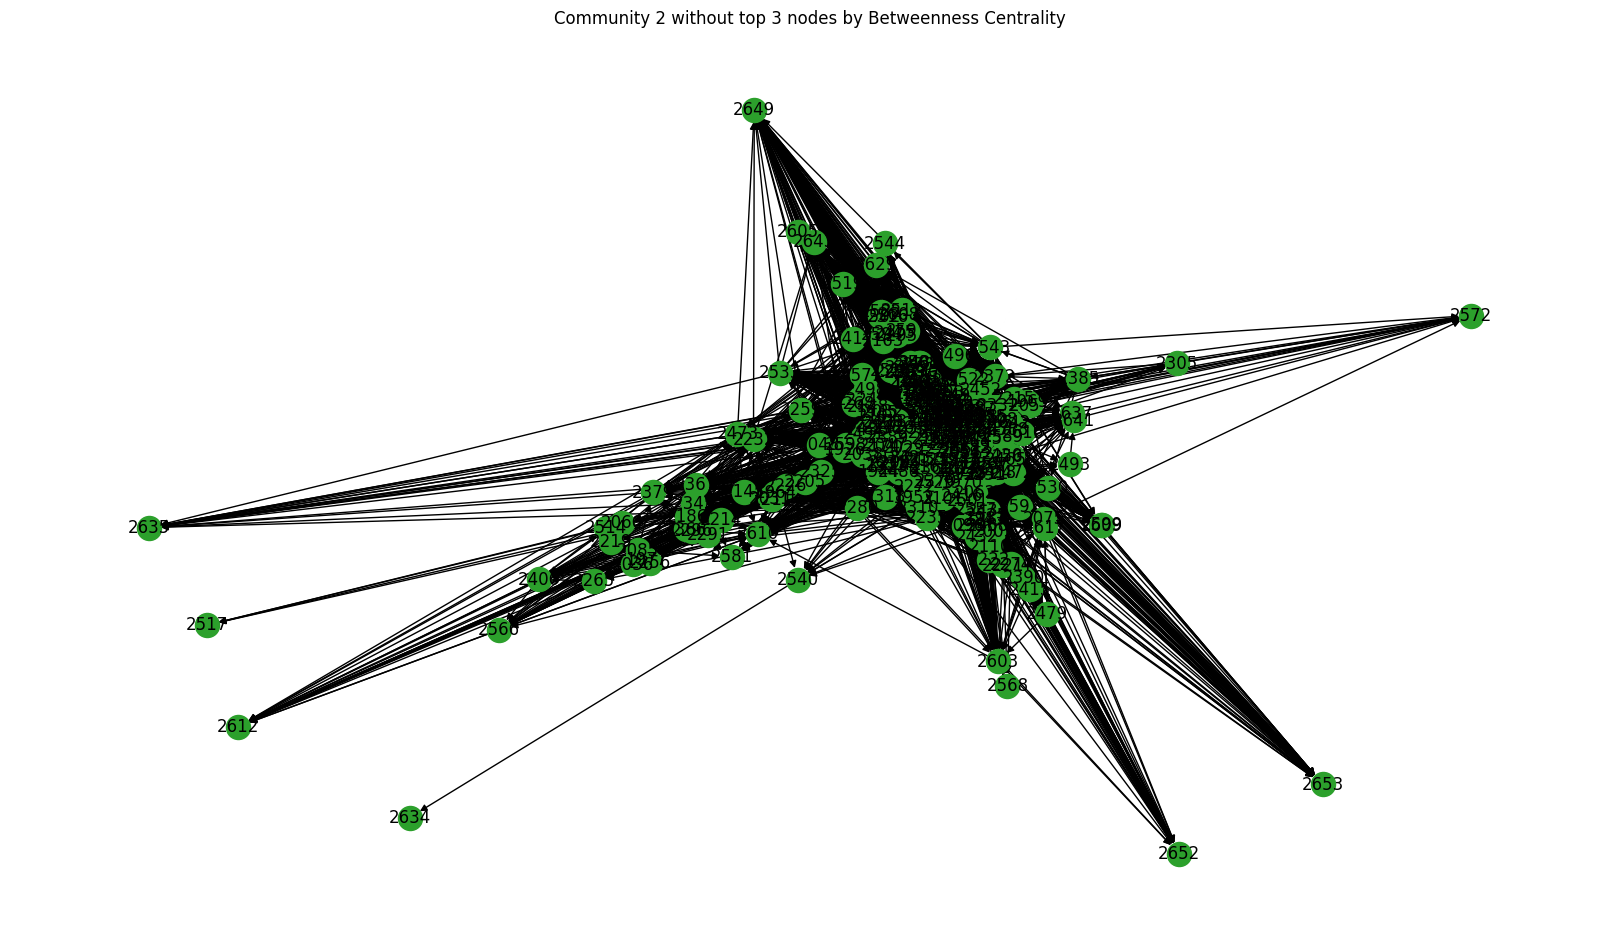

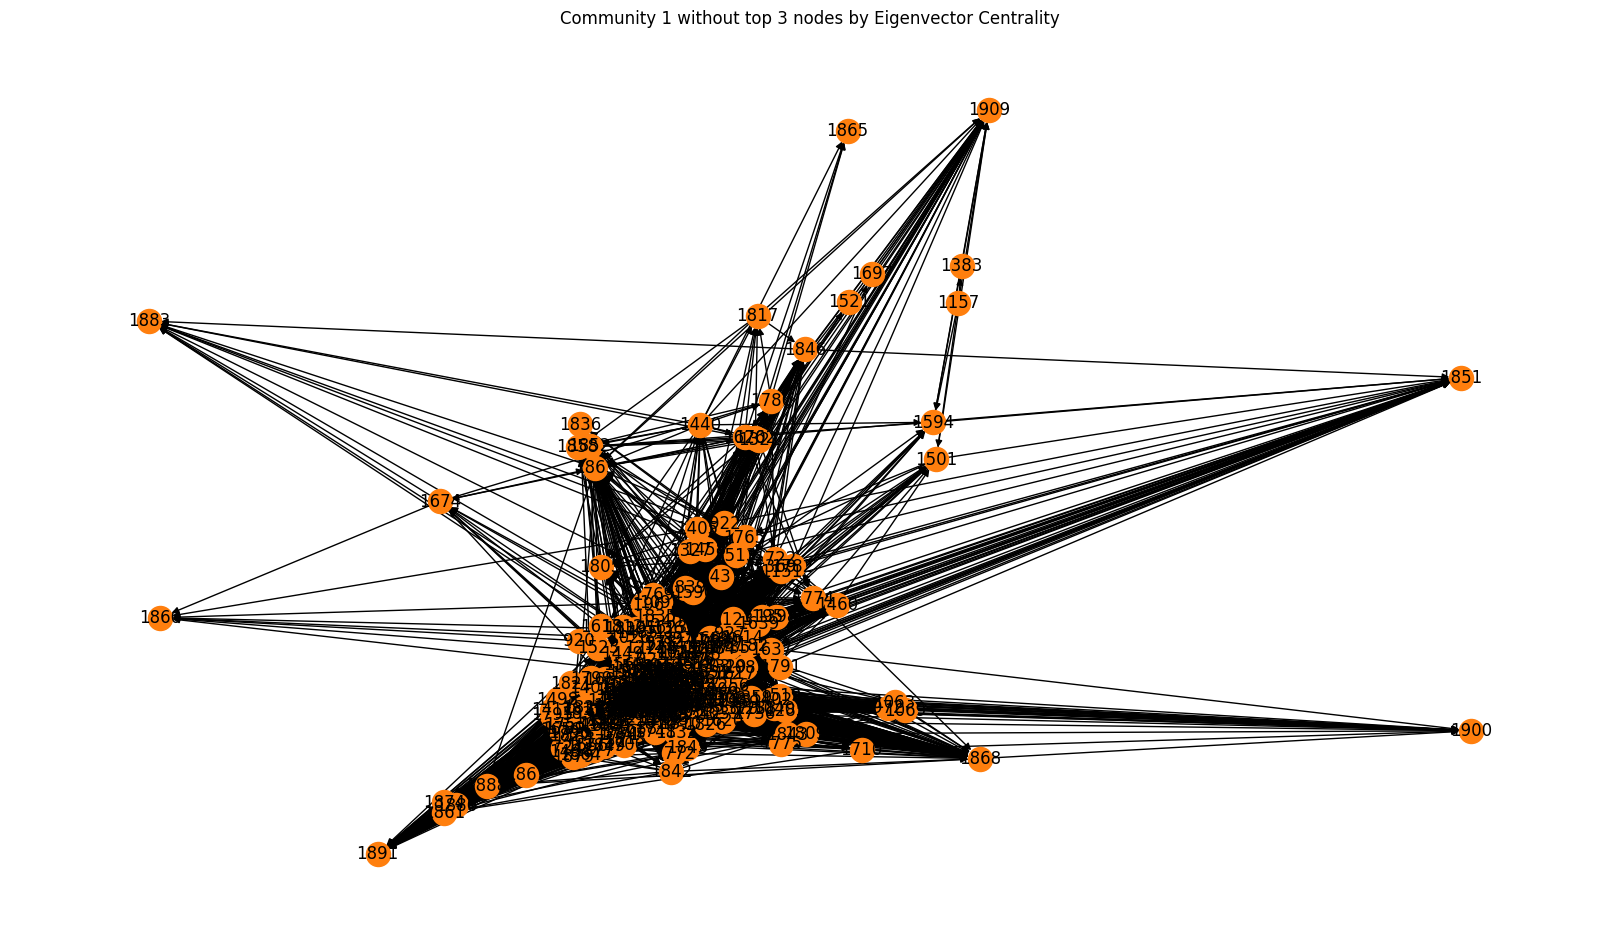

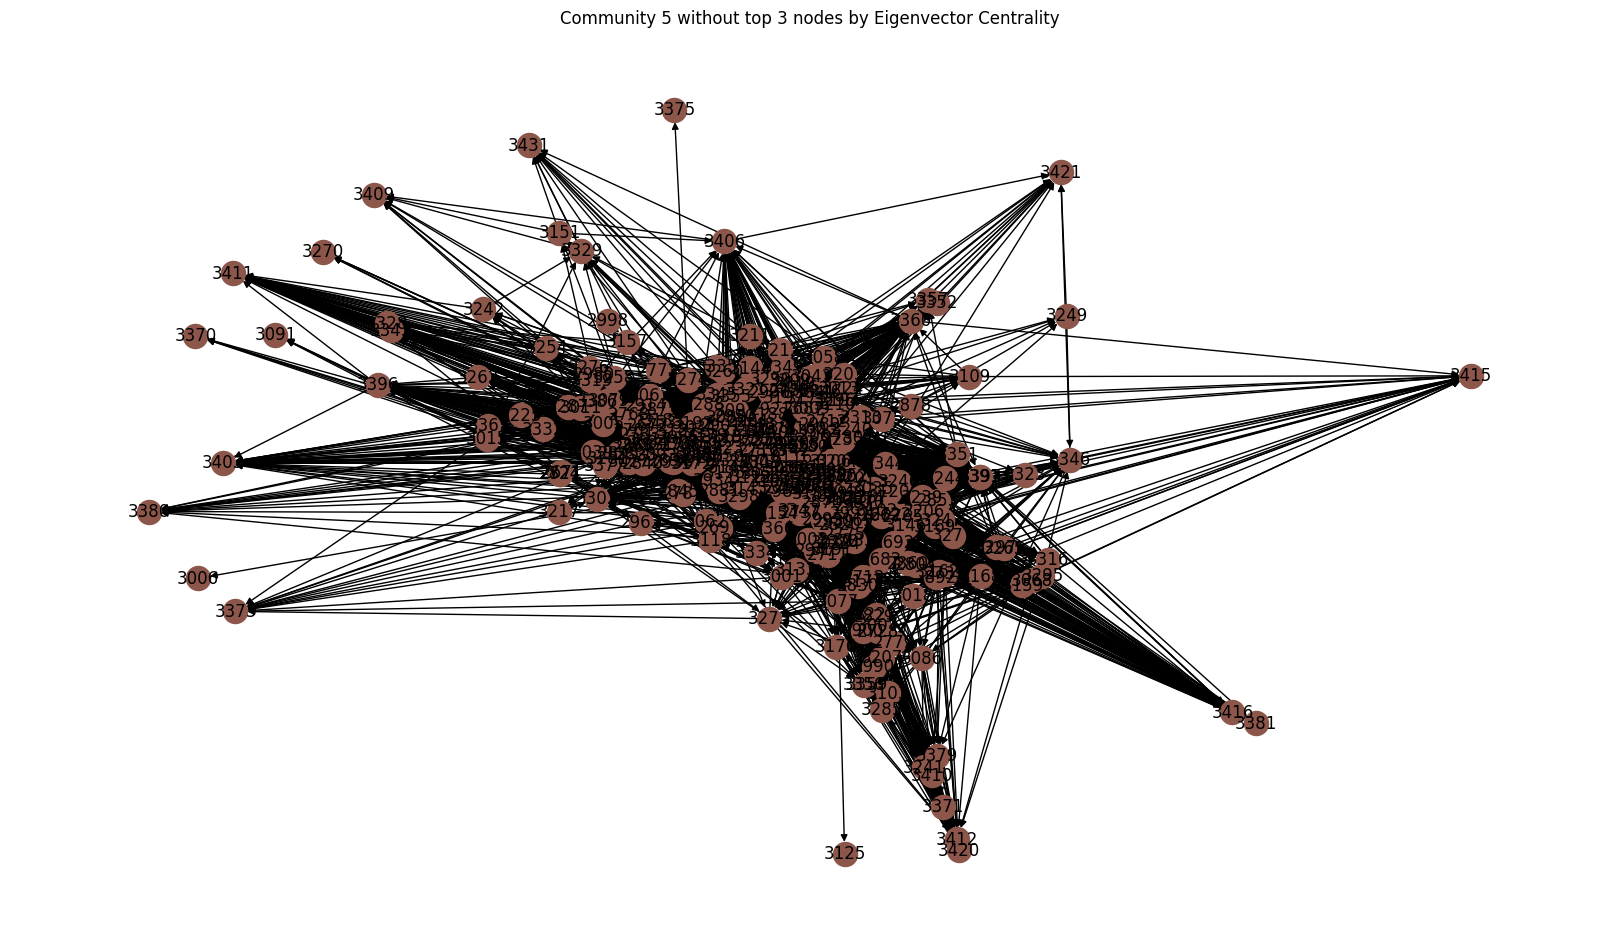

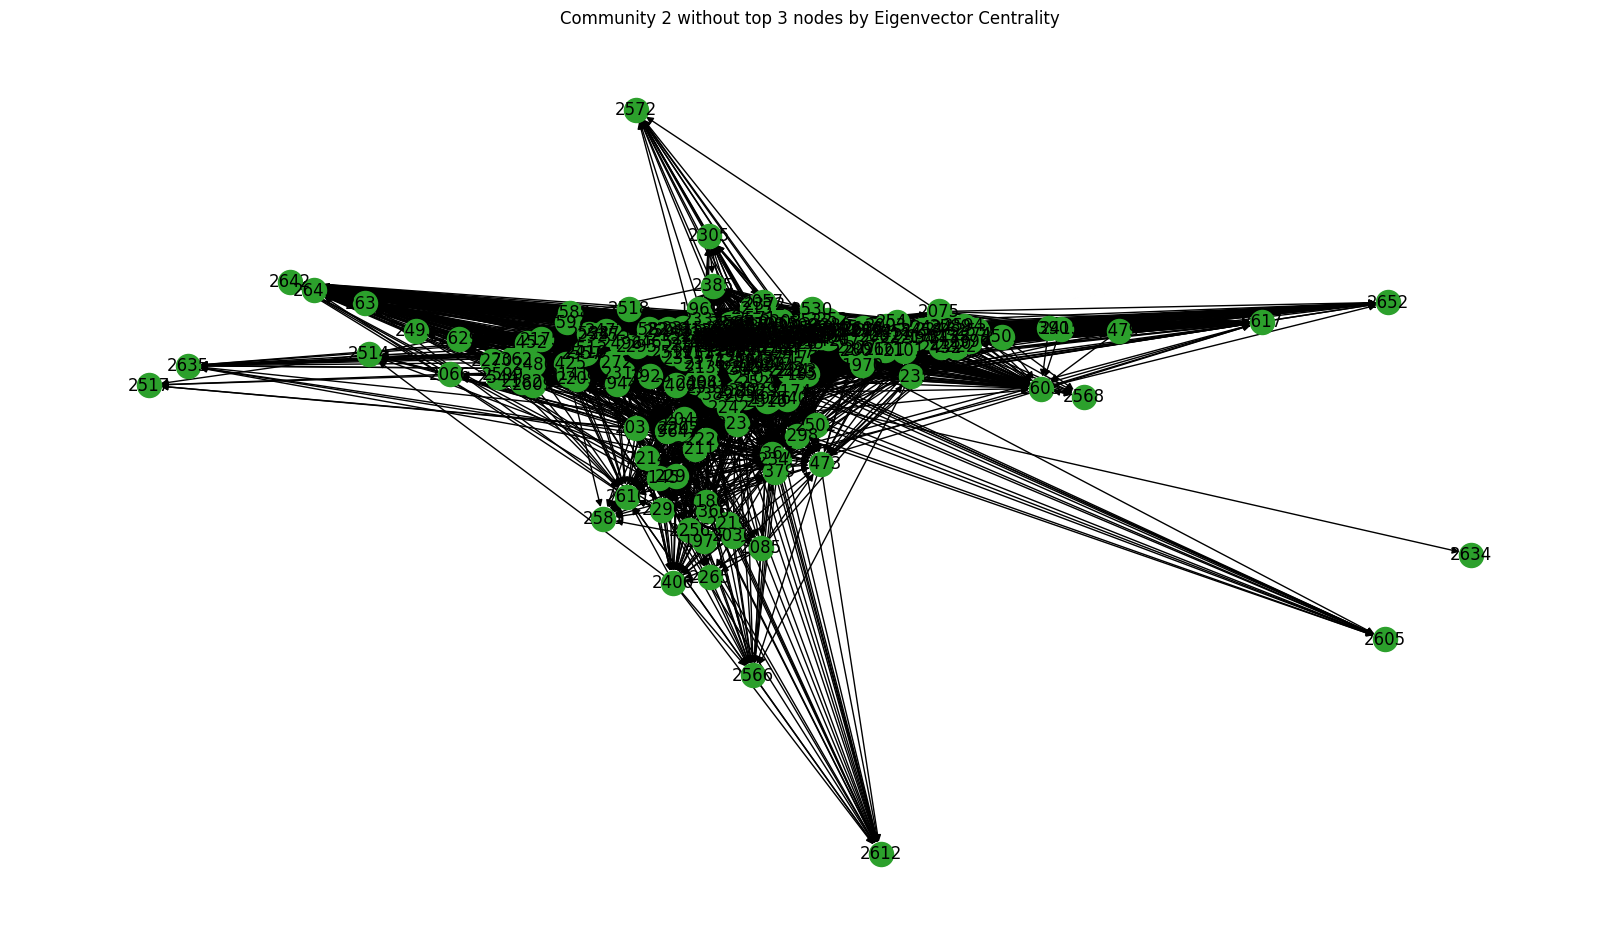

In [85]:
centrality_measures = {
    'Degree Centrality': nx.degree_centrality,
    'Closeness Centrality': nx.closeness_centrality,
    'Betweenness Centrality': nx.betweenness_centrality,
    'Eigenvector Centrality': nx.eigenvector_centrality
}

for measure_name, centrality_func in centrality_measures.items():
    for community_id in three_largest_communities:
        subgraph = G.subgraph(community_nodes[community_id])

        try:
            # Adjusting for Eigenvector centrality
            if measure_name == 'Eigenvector Centrality':
                centrality = centrality_func(subgraph, max_iter=1500)
            else:
                centrality = centrality_func(subgraph)
        except nx.PowerIterationFailedConvergence:
            print(f"Failed to converge for {measure_name} in community {community_id}.")
            continue

        # Identify top 3 nodes
        top_3_nodes = sorted(centrality, key=centrality.get, reverse=True)[:3]

        # Create a subgraph without the top 3 nodes
        subgraph_removed = subgraph.copy()
        subgraph_removed.remove_nodes_from(top_3_nodes)

        # Draw the community without the top 3 nodes
        plt.figure(figsize=(16, 9))
        nx.draw(subgraph_removed, with_labels=True, node_color=f'C{community_id}')
        plt.title(f'Community {community_id} without top 3 nodes by {measure_name}')
        plt.show()

## **10. Draw the influencers of those top 3 communities.**

## **11. Design an action plan:** 
- ### **a. Use hypothetical business (telecom, marketing agency, etc.).** 
- ### **b. Use a hypothetical marketing budget.** 
- ### **c. Use a hypothetical cost per action (advertisement cost).** 
- ### **d. Decide whom should you target?** 